In [11]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [13]:
#  Task 5: Decision Trees and Random Forests

#  Step 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# ✅ Step 2. Load Dataset
data = pd.read_csv("E:\heart.csv")
data.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
None


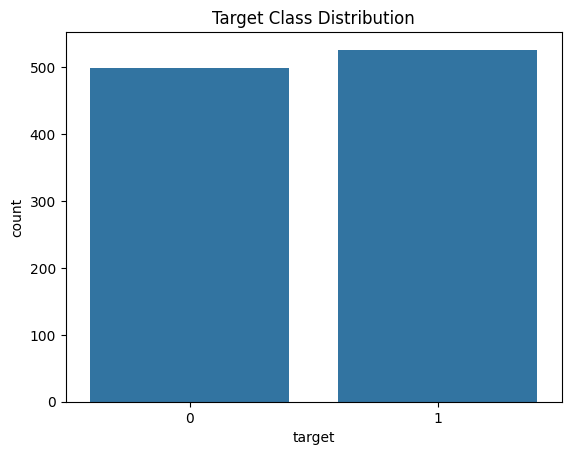

In [14]:
# Step 3. Data Preprocessing

# Check for null values
print(data.isnull().sum())

# Basic info
print(data.info())

# Encode if needed (already numerical in heart.csv)
# For EDA: check target balance
sns.countplot(x='target', data=data)
plt.title('Target Class Distribution')
plt.show()


In [15]:
#  Step 4. Train-Test Split

X = data.drop('target', axis=1)
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Decision Tree Accuracy: 0.7804878048780488
              precision    recall  f1-score   support

           0       0.85      0.68      0.75       102
           1       0.73      0.88      0.80       103

    accuracy                           0.78       205
   macro avg       0.79      0.78      0.78       205
weighted avg       0.79      0.78      0.78       205



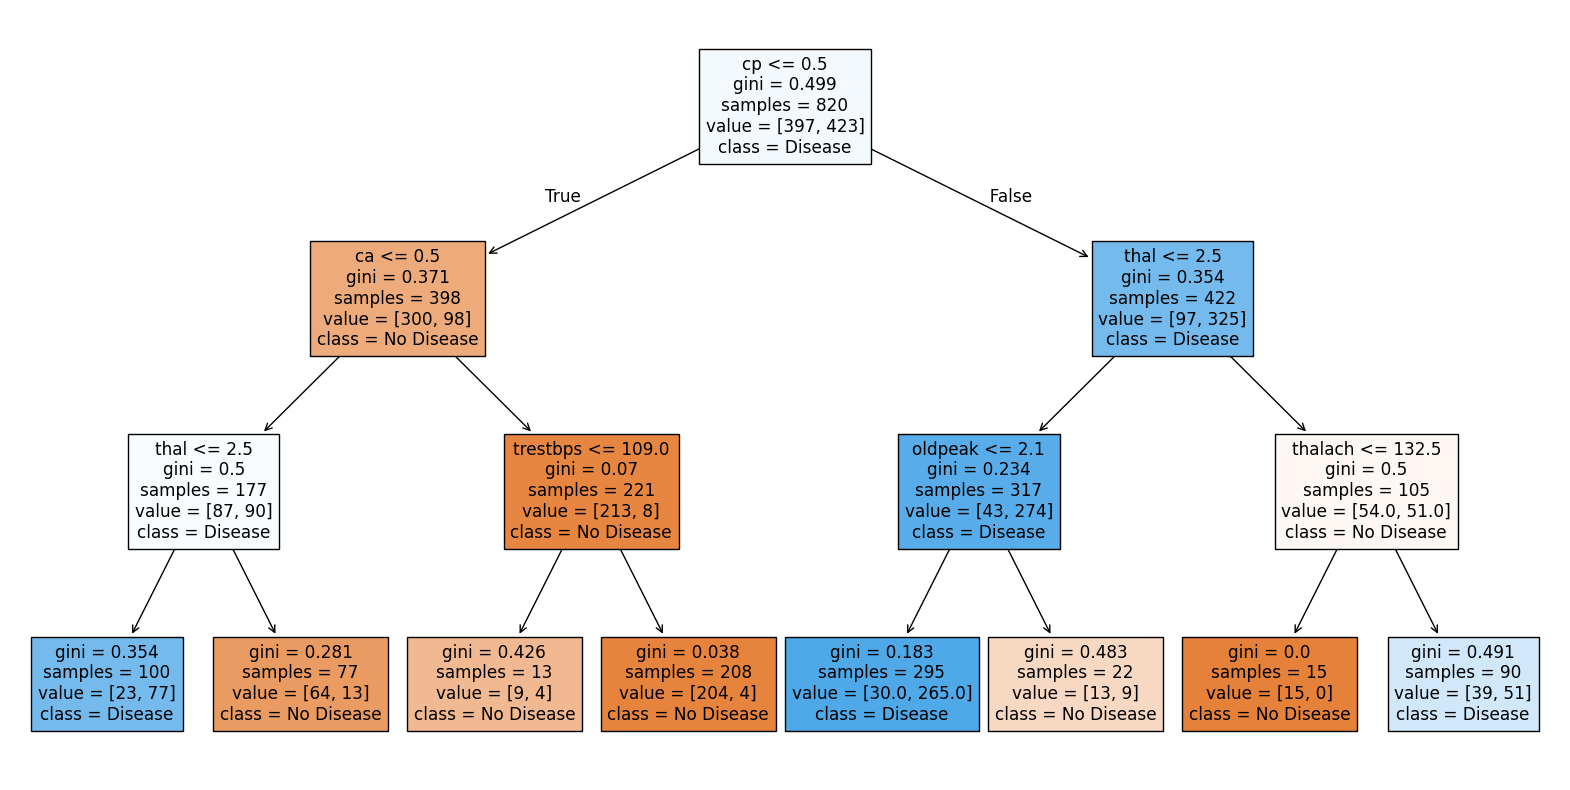

In [16]:
#  Step 5. Train Decision Tree Classifier

dtree = DecisionTreeClassifier(max_depth=3, random_state=42)
dtree.fit(X_train, y_train)

# Predictions
y_pred_dt = dtree.predict(X_test)

# Accuracy
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

#  Visualize Decision Tree
plt.figure(figsize=(20,10))
plot_tree(dtree, filled=True, feature_names=X.columns, class_names=['No Disease', 'Disease'])
plt.show()


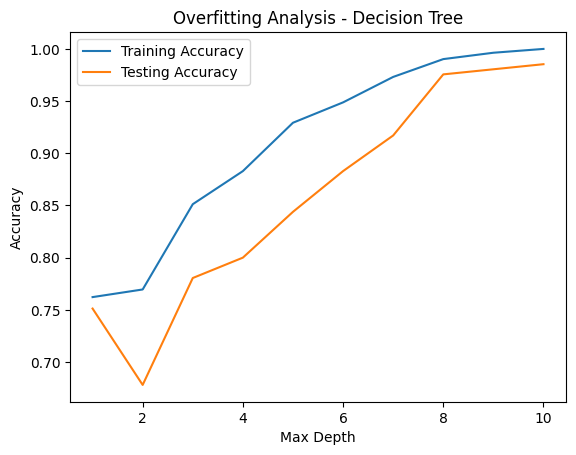

In [17]:
#  Step 6. Analyze Overfitting - Varying max_depth

train_acc = []
test_acc = []
depths = range(1, 11)

for d in depths:
    model = DecisionTreeClassifier(max_depth=d, random_state=42)
    model.fit(X_train, y_train)
    train_acc.append(model.score(X_train, y_train))
    test_acc.append(model.score(X_test, y_test))

plt.plot(depths, train_acc, label='Training Accuracy')
plt.plot(depths, test_acc, label='Testing Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Overfitting Analysis - Decision Tree')
plt.show()


In [18]:
#  Step 7. Train Random Forest Classifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf.predict(X_test)

# Accuracy
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.9853658536585366
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



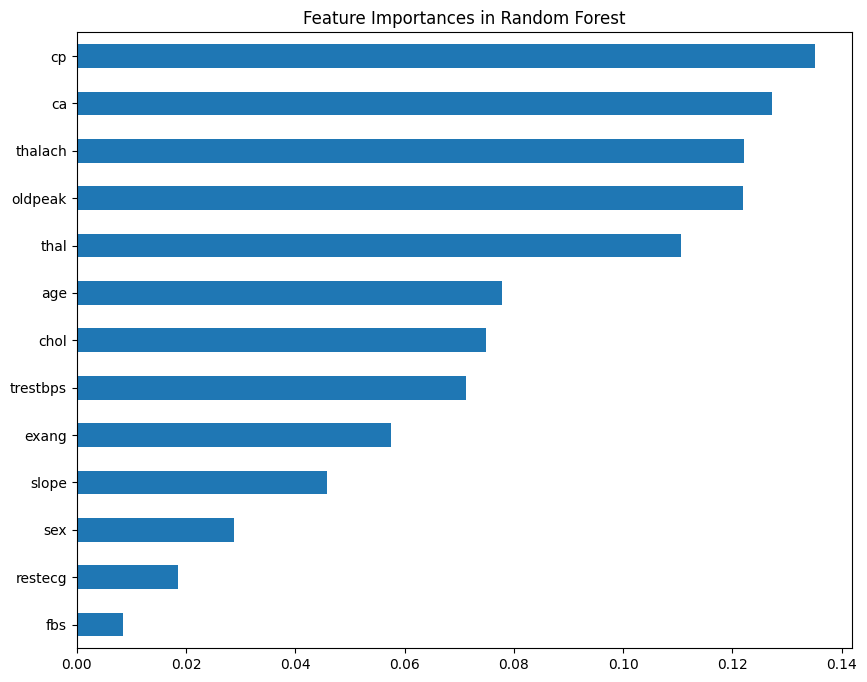

In [19]:
#  Step 8. Feature Importances

feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances.sort_values().plot(kind='barh', figsize=(10,8))
plt.title("Feature Importances in Random Forest")
plt.show()


In [20]:
#  Step 9. Cross-Validation Evaluation

cv_scores = cross_val_score(rf, X, y, cv=5)
print("Cross-validation scores:", cv_scores)
print("Average CV score:", cv_scores.mean())


Cross-validation scores: [1.         1.         1.         1.         0.98536585]
Average CV score: 0.9970731707317073
